<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=25>
        نمونه‌برداری
    </font>
</div>

<div style="direction:rtl;line-height:300%;">
	<font face="B Nazanin" size=3>
در این سوال قصد داریم الگوریتم‌های مختلف نمونه‌برداری را پیاده‌سازی کنیم. هدف اصلی مقایسه‌ی حاصل این نمونه‌برداری‌ها با نقاط توزیع اصلی است. 
    </font>
</div>

In [36]:
import numpy as np
import matplotlib.pyplot as plt

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در مرحله‌ی اول مجموعه‌ داده‌های مورد نیاز را برای نمونه‌برداری پیاده‌سازی می‌کنیم. در این قسمت از معادلات گوسی دوبعدی استفاده خواهیم کرد که از معادلات زیر استفاده می‌کند.
    </font>
    </div>

\begin{equation}
p
(
a
,
b
)
=
N
(
\begin{bmatrix}
a \\ b
\end{bmatrix}
;
\begin{bmatrix}
μ_a \\
μ_b
\end{bmatrix}
,
\begin{bmatrix}
σ_a &
c
o
v
(
a
,
b
) \\
c
o
v
(
a
,
b
) &
σ_b
\end{bmatrix}
)
=
N
(
\begin{bmatrix}
a \\
b
\end{bmatrix}
;
\begin{bmatrix}
0 \\
0
\end{bmatrix}
,
\begin{bmatrix}
1 &
0.5 \\
0.5 &
1
\end{bmatrix}
)
.
\end{equation}

In [37]:
a_mean = 0
b_mean = 0
a_sigma = 1
b_sigma = 1
a_b_cov = 0.5

joint_cov = np.vstack(((a_sigma, a_b_cov), (a_b_cov, b_sigma)))

joint_mu = np.vstack((a_mean, b_mean))


<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
نمونه داده‌های مورد نیاز در پایین ذخیره شده است. نموداری از این داده‌ها برای مقایسه با داده‌های آتی در قسمت مشخص 
       شده رسم کنید
    </font>
    </div>

In [38]:
N = 1000
D = 2
random_data = np.random.randn(D, N)
L = np.linalg.cholesky(joint_cov)
samples_from_true_distribution =  L @ random_data + joint_mu

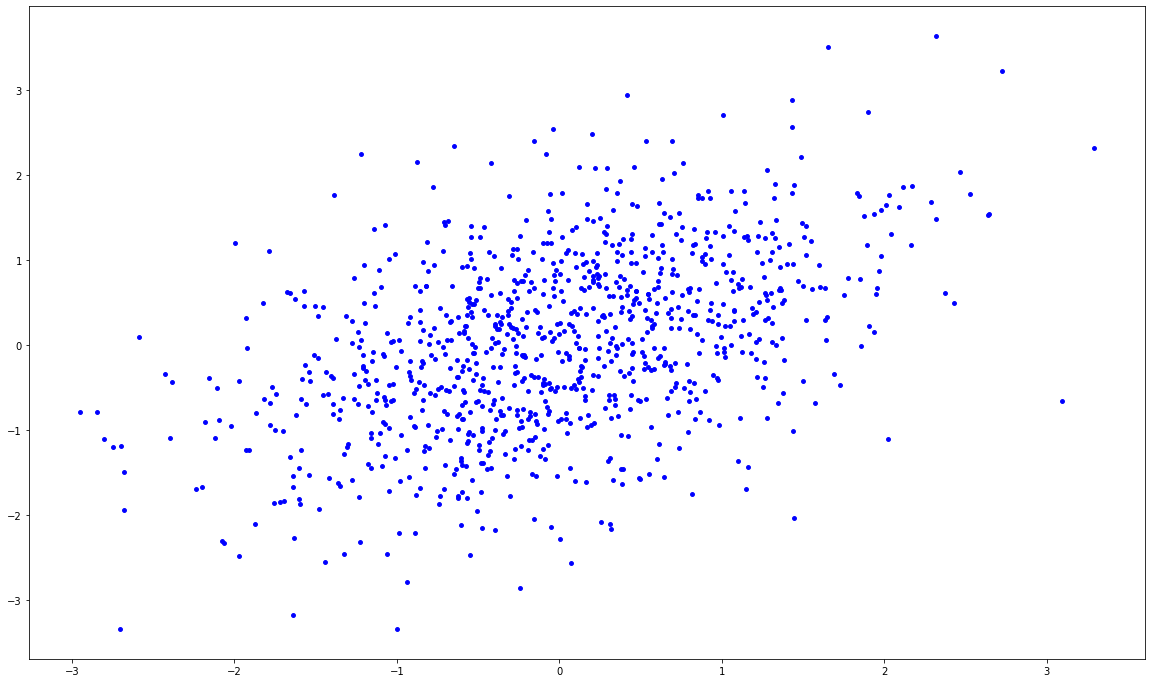

In [39]:
def show_scattar(x,y,color = "blue",size = 15):
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.scatter(x, y,color = color,s = size)
    plt.show()
show_scattar(samples_from_true_distribution[0,:], samples_from_true_distribution[1,:])


<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
دقت کنید که برای هر توزیع گوسین داریم :
    </font>
    </div>
    $$
    b|A \sim N(\mu_b + \frac{cov(a,b)}{std(a)} (A - \mu_a),std(b) - \frac{cov(a,b)^2}{std(a)}
    $$

 <div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Prior Sampling
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
الگوریتم نام‌برده شده را در این قسمت پیاده‌سازی کنید.
    </font>
    </div>

In [40]:

def prior_sampling():
    N = 1000
    random_a =list( np.random.normal(a_mean, a_sigma, N))
    b_sigma_prim = b_sigma - (a_b_cov**2)/(a_sigma)
    f = lambda x : np.random.normal(b_mean+(a_b_cov/(a_sigma))*(x-a_mean), b_sigma_prim, 1)
    random_b =list(map(f,random_a))
    return random_a,random_b

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم نمودار راستی‌آزمایی کنید.
    </font>
    </div>

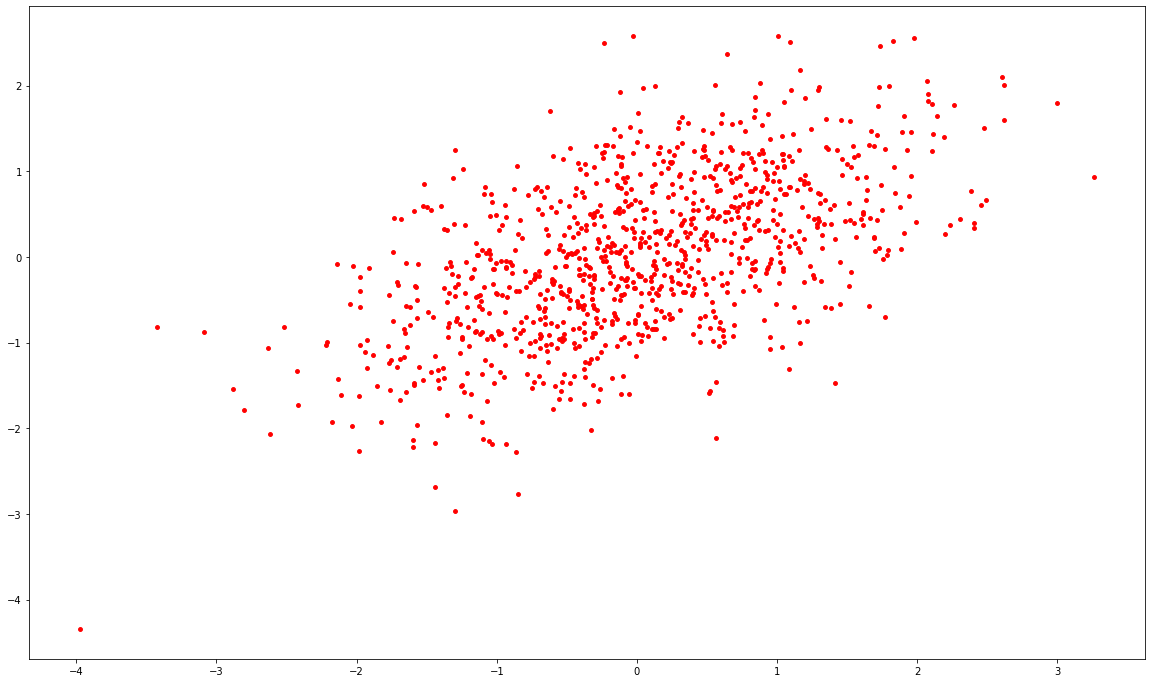

In [41]:
a_sample_prior , b_sample_prior = prior_sampling()
show_scattar(a_sample_prior,b_sample_prior,"red")

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
همانطور که واضح است داده های سمپل شده بسیار به توزیع اصلی شباهت دارند 

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
توضیحات سمپلینگ:
        <br>
        ابتدا ۱۰۰۰ مورد عدد رندم با توزیع گوسین a تولید می‌کنیم.
        <br>
        سپس با استفاده ازهر یک از ۱۰۰۰ نمونه سمپل نمونه دیگر را با فرمولی که بالا داده شد سمپل می‌کنیم.

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Gibbs Sampling
        </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این قسمت باید این الگوریتم را در دو قسمت پیاده‌سازی کنید؛ در قسمت اول باید تابع فاصله‌های شرطی که برای این الگوریت نیاز است را پیاده‌سازی کنید. همانطور که می‌دانید، نمونه برداری گیبس به توزیع‌های شرطی برای هر متغیر نیاز دارد. در قسمت زیر این توزیع‌ها را برای توزیع گوسی پیاده کنید
    </font>
    </div>

In [42]:
def get_conditional_dist(x,prior_mean = b_mean,prior_sigma = b_sigma,condition_mean = a_mean,condition_sigma = a_sigma):
    return np.random.normal(prior_mean+(a_b_cov/(condition_sigma))*(x-condition_mean), prior_sigma - (a_b_cov**2)/(condition_sigma), 1)

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
خروجی تابع بالا را برای داده‌های موجود در متغیر زیر بریزید.
    </font>
    </div>

In [43]:
univariate_conditionals =list(map(get_conditional_dist,samples_from_true_distribution[0,:]))

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
الگوریتم نمونه‌برداری گیبس را با شرایط توضیح داده شده و برای داده‌های موجود پیاده‌سازی کنید؛
    </font>
    </div>

In [44]:
def gibbs_sampling(limit = 1000,is_it_from_univariate = False):
    sample_a = []
    sample_b = []
    if not is_it_from_univariate:
        a = np.random.normal(a_mean, a_sigma, 1)
        b = np.random.normal(b_mean, b_sigma, 1)
        for i in range(limit):
            b = get_conditional_dist(a)
            a = get_conditional_dist(b,prior_mean = a_mean,prior_sigma = a_sigma,condition_mean = b_mean,condition_sigma = b_sigma) # sample ended
            sample_a.append(a)
            sample_b.append(b)
        return sample_a,sample_b
    return samples_from_true_distribution[0,:],univariate_conditionals
        
        
    # insert code here

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم یک نمودار راستی‌آزمایی کنید.
    </font>
    </div>

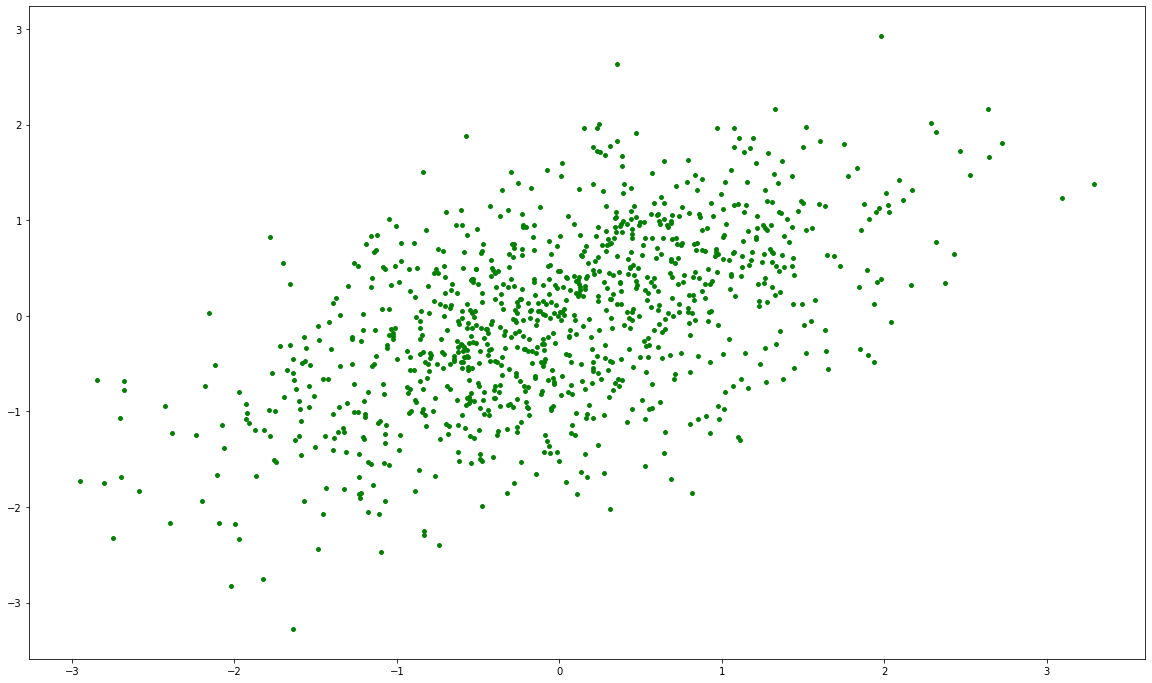

In [45]:
a_sample_gibs , b_sample_gibs = gibbs_sampling(is_it_from_univariate = True)
show_scattar(a_sample_gibs , b_sample_gibs,"green")

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
توضیحات سمپلینگ: is_it_from_univariate = True
        <br>
فرض می‌:کنیم که x های توزیع دیده شده اند و از سمپل اصلی استفاده می‌:کنیم سپس بر حسب آن مقدار y هارا سمپل می‌:نیم که در بلاک univariate_conditionals سمپل شده اند را به عنوان y بر می‌گردانیم 
        



more samling : N = 1000


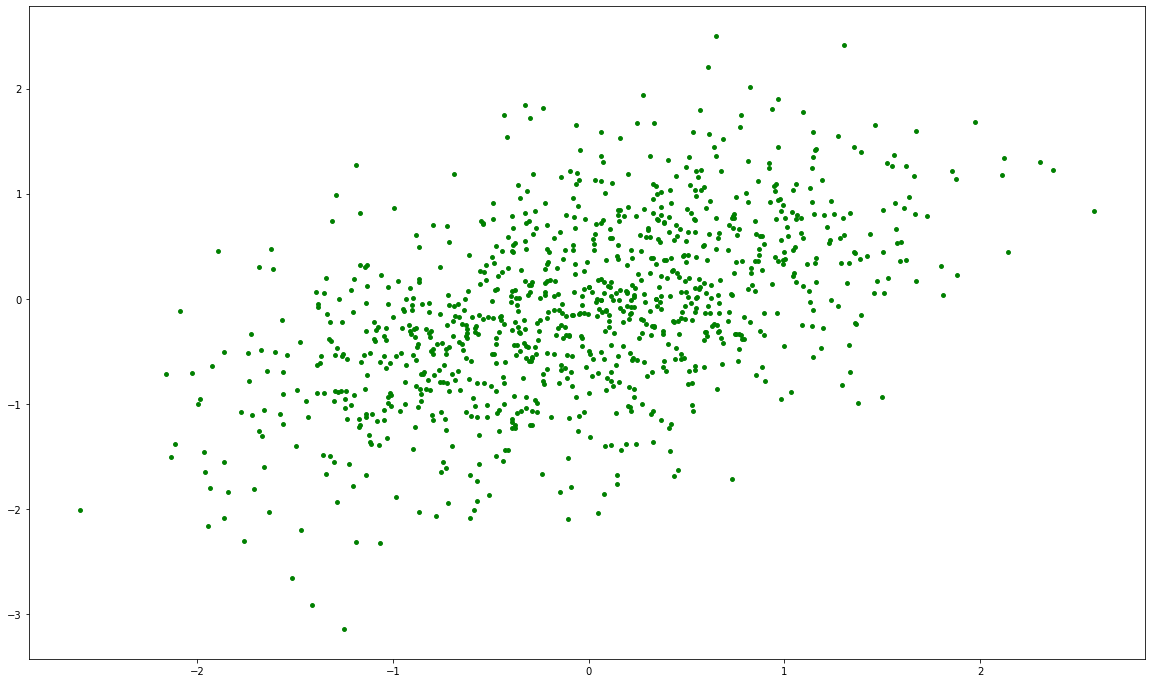

In [46]:
a_sample_gib , b_sample_gib = gibbs_sampling(N,is_it_from_univariate = False)
print("more samling : N = 1000")
show_scattar(a_sample_gib , b_sample_gib,"green")


<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
توضیحات سمپلینگ: is_it_from_univariate = False
        <br>
        ابتدا از هر کدام a,bیک عدد رندم با توزیع گوسین هر کدام تولید می‌کنیم.
        <br>
        سپس ۱۰۰۰ بار عمل سمپلینگ را انجام می‌دهیم منتها در هر بار یکبار به شرط a و بار دیگر به شرط b سمپل می‌کنیم.

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=25>
        Rejection Sampling
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
پیاده‌سازی این الگوریتم از الگوریتم گیبس ساده‌تر است. در قسمت تعیین شده، کد تابع این الگوریتم را پیاده‌سازی کنید. توجه کنید که اگر داده‌ها نیاز به نرمال‌سازی دارند، کد مربوط به این قسمت را هم در همین سل بنویسید.
    </font>
    </div>

In [48]:
import math
import random
import numpy as np
def normpdf(x, mean, sd):
    var = float(sd)**2
    denom = (2*math.pi*var)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var))
    return num/denom
def multivariate_normal(x,covariance = joint_cov):
    """pdf of the multivariate normal distribution."""
    x_m = x
    return (1. / (np.sqrt((2 * np.pi)**2 * np.linalg.det(covariance))) * 
            np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))
def rejection_sampling(threshhold = 0.2,is_is_prior = True):
    N = 50000
    b_sigma_prim = b_sigma - (a_b_cov**2)/(a_sigma)
    a_sigma_prim = a_sigma - (a_b_cov**2)/(b_sigma)
    f = lambda x,y :normpdf(x,b_mean+(a_b_cov/(a_sigma))*(y-a_mean), b_sigma_prim)
    g = lambda x,y :normpdf(x,a_mean+(a_b_cov/(b_sigma))*(y-b_mean), a_sigma_prim)
    a_sample =[]
    b_sample = []
    if is_is_prior:# prior distribution
        random_a =list( np.random.uniform(2*min(samples_from_true_distribution[0,:]), 2*max(samples_from_true_distribution[0,:]), N))
        random_b =list( np.random.uniform(2*min(samples_from_true_distribution[1,:]),2* max(samples_from_true_distribution[1,:]), N))
        uniform_pdf_max = 1./(2*np.pi * np.sqrt(np.linalg.det(joint_cov)))
        for a,b in zip(random_b,random_a) :
            if multivariate_normal(np.array([a,b]),joint_cov) >= random.uniform(0,uniform_pdf_max):
                a_sample.append(a)
                b_sample.append(b)
    else: # another approach
        N = 1000
        random_a =list( np.random.normal(a_mean,a_sigma, N))
        random_b =list( np.random.normal(b_mean,b_sigma, N))
        uniform_pdf_max = 1./(2*np.pi * np.sqrt(np.linalg.det(joint_cov)))
        for a,b in zip(random_b,random_a) :
            if f(b,a) > threshhold and g(a,b) > threshhold :
                a_sample.append(a)
                b_sample.append(b)
    return a_sample,b_sample
    # insert code here

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
تابع پیاده‌سازی شده‌ی خود را با رسم نمودار راستی‌آزمایی کنید.
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=4>
        
        روش اول :
    </font>
    <br>
    ماکسیمم مقدار pdf جوین را میداینم . یک توزیع یونیفرم ۲ بعدی را در نظر بگیرید که بازه های آن ۲ برابر دو سر بازه داده های سمپل اصلی است.
    <br>
    بنابراین هر بار یک بردار سمپل میکنیم (توزیع یونیفرم)‌سپس یک عدد رندم با توزیع یونیفرم تولید می‌کنیم.(که بازه آن صفر تاpdf_max است.) 
    <br>
    اگر عدد بدست آمده از pdf_join مقدار بردار رندم تولید شده کمتر باشد آن بردار را به عنوان سمپل قبول می‌کنیم.
    به دلیل اینکه ریت قبولی سمپل کم است تعداد سمپل هارا 50000 در نظر میگیریم.
    </div>

number of sample accepted:
1532 , 3.064%


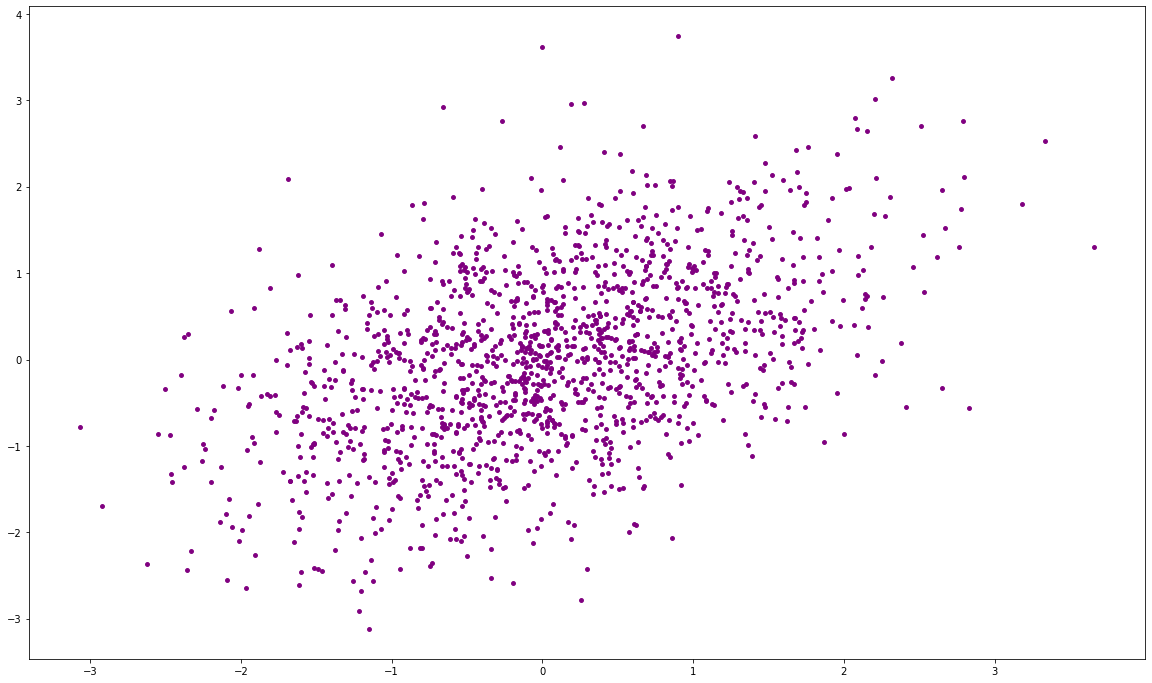

In [49]:
a_sample_reject , b_sample_reject = rejection_sampling(0.1)
print("number of sample accepted:")
print(str(len(a_sample_reject)) + " , " + str(100* len(a_sample_reject)/50000) + "%")
show_scattar(a_sample_reject , b_sample_reject,"purple")


<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=4>
        
        روش دوم :
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
توضیحات سمپلینگ:
        <br>
        از هر دو توزیع گوسین با میانگین و واریانس خودشان ۱۰۰۰ عدد رندم تولید میکنیم.
        <br>
        سپس در هر نقطه متناظر احتمال هر کدام را بر حسب دیگری می‌نویسیم اگر هردو عدد بدست آمده از PDF مقداری کمتر از threshhold داشت آنرا reject می‌کنیم.

number of sample accepted:
695 , 69.5%


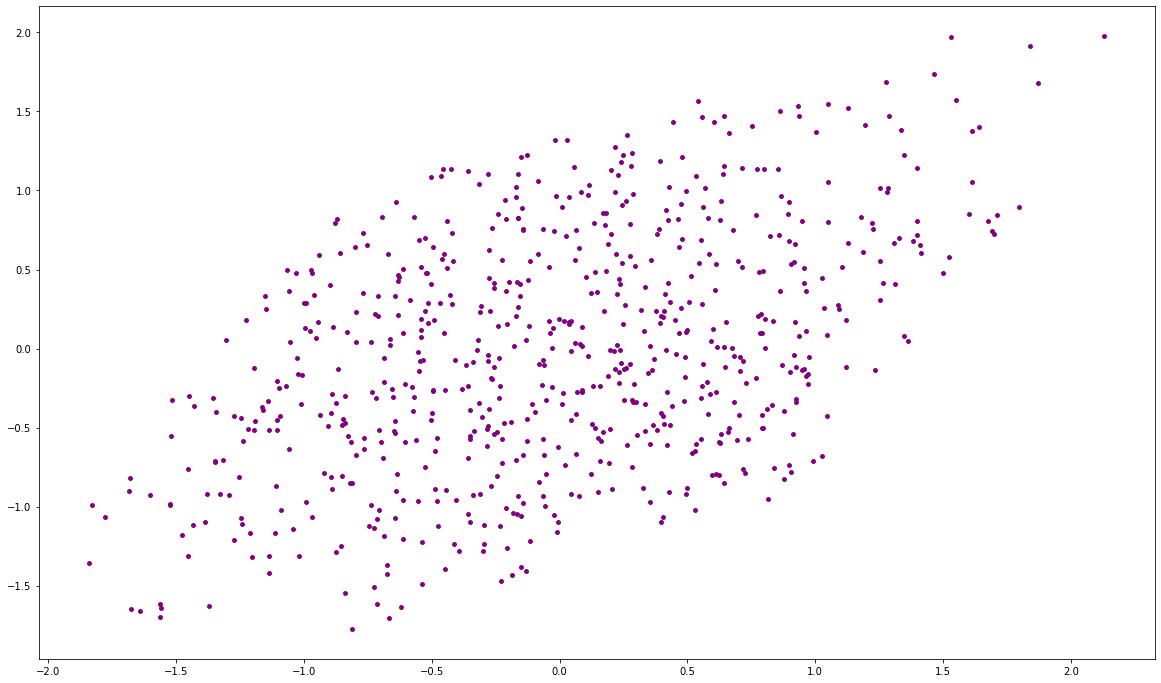

In [50]:
a_sample_reject_prime , b_sample_reject_prime = rejection_sampling(0.1,False)
print("number of sample accepted:")
print(str(len(a_sample_reject_prime)) + " , " + str(100* len(a_sample_reject_prime)/1000) + "%")
show_scattar(a_sample_reject_prime , b_sample_reject_prime,"purple")

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این مرحله، تعدادی نقطه را با استفاده از الگوریتم‌های پیاده‌سازی شده نمونه‌برداری کنید و با توزیع اصلی مقایسه کنید. نمودار‌های مورد نیاز برای هر قسمت را سل زیر رسم کنید. نتیجه‌گیری خود را به طور مختصر و مستند در قسمت تعیین شده بنویسید.
    </font>
    </div>

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
هر دو داده سمپل خود و سمپل اصلی را در یک پلات رسم میکنیم .
        <br>
        داده های قرمز سمپل ما و داده های ابی سمپل اصلی است.

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=5>
        prior Sampling vs sample_from_True
     </font>
    </div>

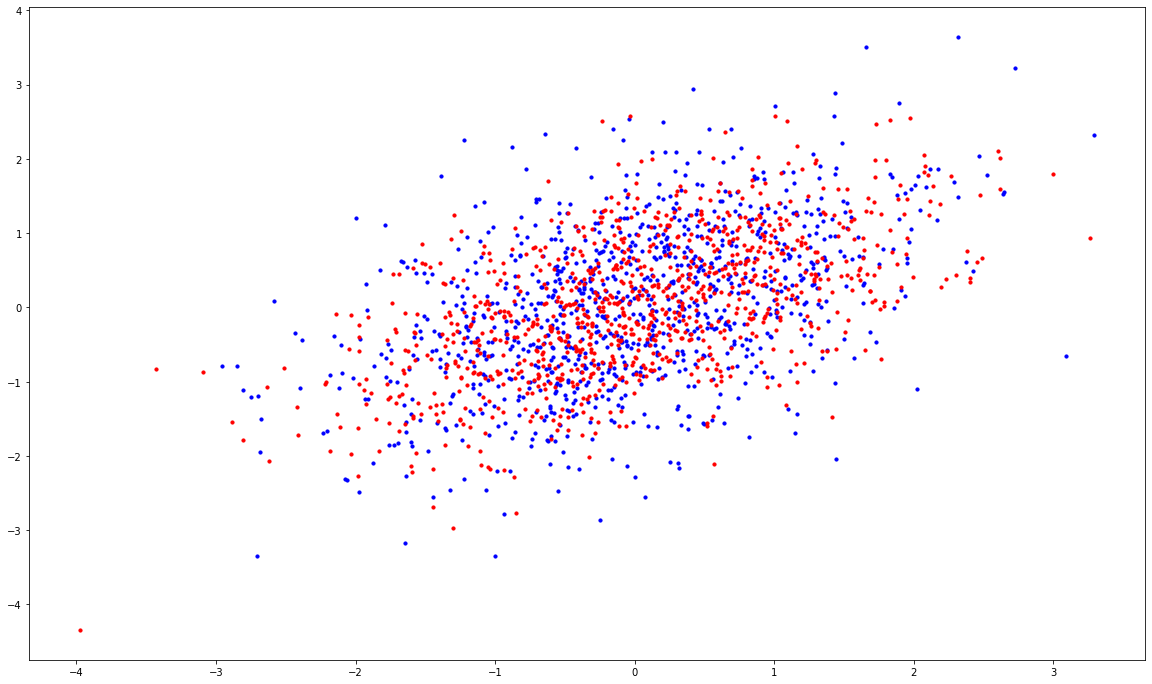

In [51]:
size = 10
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.scatter(samples_from_true_distribution[0,:], samples_from_true_distribution[1,:],color = "blue",s=size)
plt.scatter(a_sample_prior,b_sample_prior,color = "red",s = size)    
plt.show()

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
از آنجا که هیچ observation ای نداریم این سمپلینگ به خوبی به توزیع  join نزدیک است.



<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
هر دو داده سمپل خود و سمپل اصلی را در یک پلات رسم میکنیم .
        <br>
        داده های سبز سمپل ما و داده های ابی سمپل اصلی است.
<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=5>
        gibbs Sampling vs sample_from_True
     </font>
    </div>

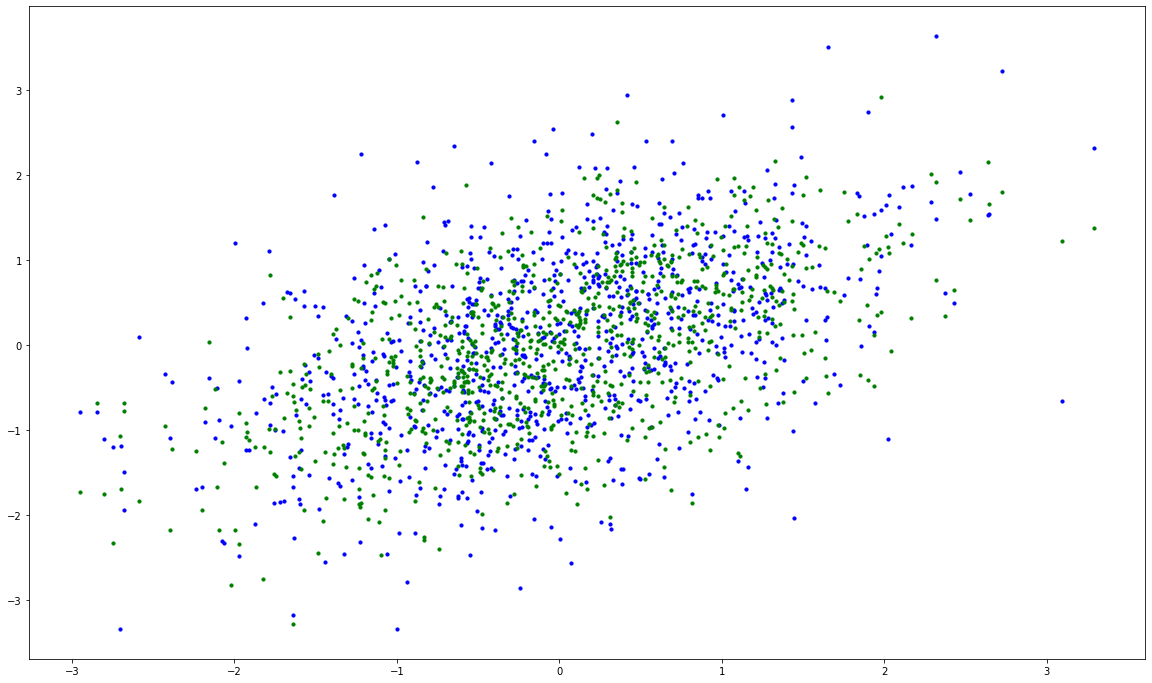

In [52]:
size = 10
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.scatter(samples_from_true_distribution[0,:], samples_from_true_distribution[1,:],color = "blue",s=size)
plt.scatter(a_sample_gibs,b_sample_gibs,color = "green",s = size)    
plt.show()

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
در این روش از انجا که دو عدد رندم اولیه مهم اند بنابراین ممکن است با ۱۰۰۰ سمپل به توزیع جوینت نزدیک نشویم اما اگر این مقدار را افزایش دهیم به توزیع جوینت نزدیک می‌شویم.
        <br>
        دقت کنید چون ممکن از دو مقدار رندم اولیه از مرکزیت توزیع جوینت دور باشند بنابراین تعداد بیشتری سمپل نیاز است تا سمپلینگ به توزیع جوینت بسیار نزدیک شود.
        <br>
        به عنوان مثال در زیر بجای ۱۰۰۰ سمپل ۴۰۰۰ سمپل می‌گیریم و ۱۰۰۰ تای اخر که استقلال بیشتری نسبت به حالت اولیه دارند را بر می‌گزینیم.

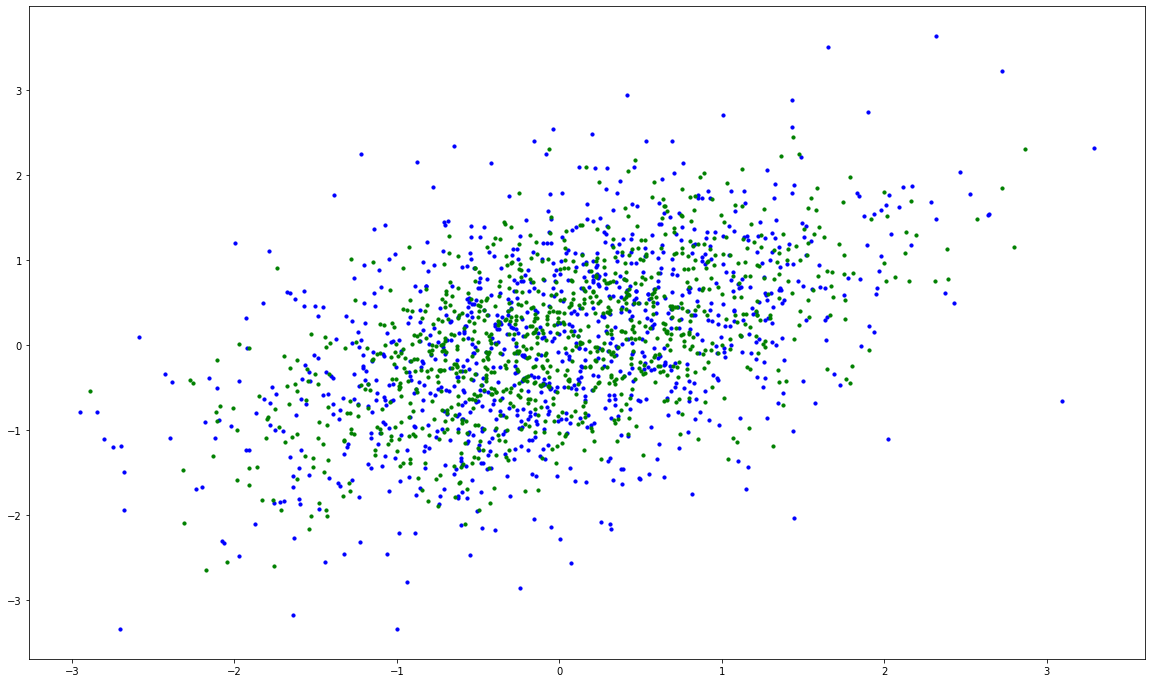

In [53]:
a_sample_gibs , b_sample_gibs = gibbs_sampling(4000)
a_sample_gibs , b_sample_gibs = a_sample_gibs[3*N:4*N],b_sample_gibs[3*N:4*N]
size = 10
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.scatter(samples_from_true_distribution[0,:], samples_from_true_distribution[1,:],color = "blue",s=size)
plt.scatter(a_sample_gibs , b_sample_gibs,color = "green",s = size)   
plt.show()

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
همانطور که واضح است داده های دور تر از مرکزیت کاهش یافته اند و توزیع به توزیع اصلی نزدیک تر است.
        

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=3>
هر دو داده بنفش خود و سمپل اصلی را در یک پلات رسم میکنیم .
        <br>
        داده های سبز سمپل ما و داده های ابی سمپل اصلی است.
<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=5>
        rejection Sampling : (is_it_prior = True )vs sample_from_True
     </font>
    </div>

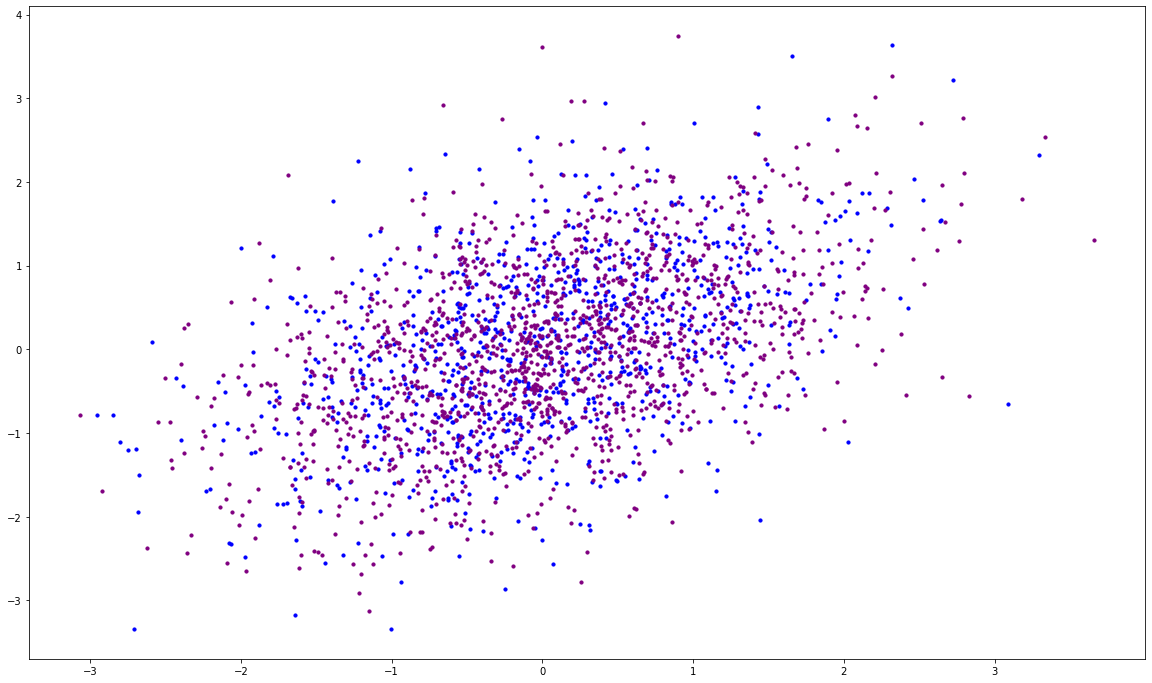

In [54]:
size = 10
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.scatter(samples_from_true_distribution[0,:], samples_from_true_distribution[1,:],color = "blue",s=size)
plt.scatter(a_sample_reject,b_sample_reject,color = "purple",s = size)    
plt.show()

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=10>
Conclusion

<div style="direction:ltr;line-height:300%;">
	<font face="XB Niloofar" size=5>
main -> blue 
        <br>
        prior -> red 
        <br>
        gibbs -> green
        <br>
        rejection -> purple
<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=5>
چون هیچ گونه مشاهده ای نداریم بنابراین الگوریتم prior بهتر است زیرا هم سریع تر بوده و هم با تعداد کمتری به توزیع جوینت همگرا می‌شود. همچنین پیاده سازی آن ساده است منتها نیاز به دانستن نوع توزیع مستقل هر کدام از متغیر ها داریم .
                
        <br>
        روش gibbs     البته دو روش برای گیبز در نظر گرفته ایم که در اولی فرض می‌:کنیم که داده های x دیده شده اند و بر حسب آن ها y را سمپل می‌کنیم و در روش دوم دو داده رندم تولید می‌کنبم و به ترتیب در هر مرحله x , y  را بر حسب دیگری سمپل می‌:کنیم.
        از آنجا که تعداد متغیر ها تنها دو تا است روش دوم از نظر بنده به روش اول برتری دارد.
        

<div style="direction:rtl;line-height:300%;">
	<font face="XB Niloofar" size=5>
در روش ریجکشن نیز دو روش برای سمپل ارائه داده ایم که اولی مقدار rate قبولی آن کم است زیرا بردار متشکل از دو متغیر را با توزیع یونیفرم سمپل می‌کنیم. اما روش اول روش معتبر تری است و همان را نیز در این جا به عنوان روش اصلی ارائه می‌دهیم . در این مورد سمپل گیری از‌آنجا که سمپل کردن از توزیع های گوسین کار سختی نمی‌باشد توصیه نمی‌شود و چون با یک توزیع دیگر توزیع خود را تقریب می‌زنیم نرخ همگرایی کم است و تعداد سمپل گیری را باید به شدت افزایش دهیم تا به نتیجه مطلوب برسیم .

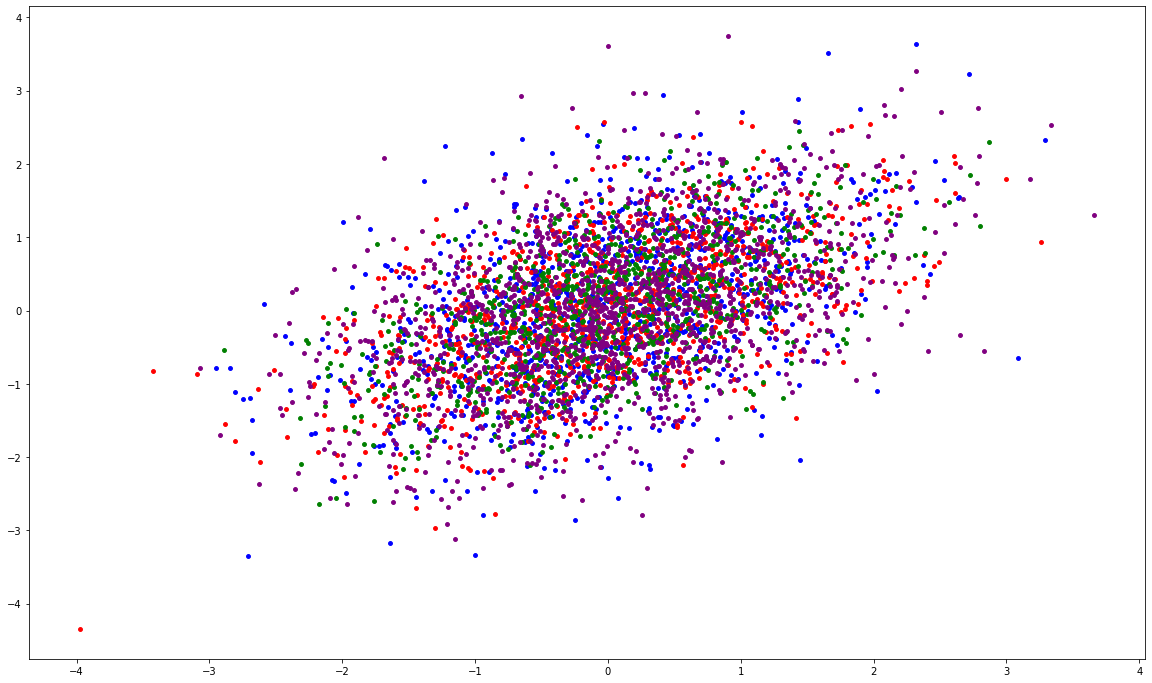

In [55]:
size = 15
fig = plt.gcf()
fig.set_size_inches(20, 12)
plt.scatter(samples_from_true_distribution[0,:], samples_from_true_distribution[1,:],color = "blue",s=size)
plt.scatter(a_sample_prior,b_sample_prior,color = "red",s = size)  
plt.scatter(a_sample_gibs,b_sample_gibs,color = "green",s = size)    
plt.scatter(a_sample_reject,b_sample_reject,color = "purple",s = size)    
plt.show()